# Setup

In [1]:
!git clone https://github.com/neuspell/neuspell
%cd neuspell

Cloning into 'neuspell'...
remote: Enumerating objects: 653, done.
remote: Counting objects: 100% (456/456), done.
remote: Compressing objects: 100% (287/287), done.
remote: Total 653 (delta 280), reused 303 (delta 151), pack-reused 197
Receiving objects: 100% (653/653), 74.43 MiB | 22.85 MiB/s, done.
Resolving deltas: 100% (306/306), done.
/content/neuspell


In [2]:
!pip install -e .

Obtaining file:///content/neuspell
     |████████████████████████████████| 2.1MB 5.8MB/s 
     |████████████████████████████████| 1.2MB 17.7MB/s 
     |████████████████████████████████| 133kB 44.8MB/s 
     |████████████████████████████████| 901kB 52.2MB/s 
     |████████████████████████████████| 3.3MB 72.2MB/s 
     |████████████████████████████████| 133kB 58.5MB/s 
     |████████████████████████████████| 81kB 12.6MB/s 
     |████████████████████████████████| 7.5MB 56.1MB/s 
ERROR: botocore 1.20.62 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.
  Running setup.py develop for neuspell


In [3]:
!pip install urllib3==1.25.4

     |████████████████████████████████| 133kB 4.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [4]:
!pip install folium==0.2.1

     |████████████████████████████████| 71kB 3.9MB/s 
  Created wheel for folium: filename=folium-0.2.1-cp37-none-any.whl size=79979 sha256=61ebcacd5da9e9b607b24a7d93b35fbaa54549cf35396e0d7ebbf08d7a1f0266
  Stored in directory: /root/.cache/pip/wheels/b8/09/f0/52d2ef419c2aaf4fb149f92a33e0008bdce7ae816f0dd8f0c5
Successfully built folium
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [5]:
!pip install -r extras-requirements.txt

Obtaining file:///content/neuspell (from -r extras-requirements.txt (line 1))
Obtaining file:///content/neuspell (from -r extras-requirements.txt (line 2))
     |████████████████████████████████| 522kB 5.4MB/s 
     |████████████████████████████████| 122kB 17.2MB/s 
     |████████████████████████████████| 266kB 15.8MB/s 
  Created wheel for jsonnet: filename=jsonnet-0.17.0-cp37-cp37m-linux_x86_64.whl size=3388776 sha256=6246b71555ce5588f1ddb12f5da905bb8252a371b145be90896a37fea7609933
  Stored in directory: /root/.cache/pip/wheels/26/7a/37/7dbcc30a6b4efd17b91ad1f0128b7bbf84813bd4e1cfb8c1e3
  Created wheel for overrides: filename=overrides-3.1.0-cp37-none-any.whl size=10174 sha256=91b7ba0f9ae6e88c534fa34aaaad07d22f43aa70d8b76fddf3b876eae567ed44
  Stored in directory: /root/.cache/pip/wheels/5c/24/13/6ef8600e6f147c95e595f1289a86a3cc82ed65df57582c65a9
Successfully built jsonnet overrides
ERROR: allennlp 1.5.0 has requirement torch<1.8.0,>=1.6.0, but you'll have torch 1.8.1+cu101 which is i

In [6]:
!pip install torch==1.6.0

     |████████████████████████████████| 748.8MB 22kB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
ERROR: allennlp 1.5.0 has requirement transformers<4.3,>=4.1, but you'll have transformers 4.5.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101


In [7]:
!pip install transformers==4.1

     |████████████████████████████████| 1.5MB 4.2MB/s 
     |████████████████████████████████| 2.9MB 24.8MB/s 
  Found existing installation: tokenizers 0.10.2
    Uninstalling tokenizers-0.10.2:
      Successfully uninstalled tokenizers-0.10.2
  Found existing installation: transformers 4.5.1
    Uninstalling transformers-4.5.1:
      Successfully uninstalled transformers-4.5.1


In [8]:
%cd data/traintest

import requests
import os

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

def create_paths(path_: str):
    if not os.path.exists(path_):
        os.makedirs(path_)
        print(f"{path_} created")
    else:
        print(f"{path_} already exists")


download_file_from_google_drive('1ZlEQKf3HMMk66F7DGFPnh-PA2cbt5K0F', 'test.1blm')
download_file_from_google_drive('1wZ6nrIYANNN3ZoHgacIg9P3UmHnBb9Wa', 'test.1blm.noise.prob')



download_file_from_google_drive('10VtrEThrDIiuFJf0gj4LeGDdP-y-yR--', 'test.bea60k')
download_file_from_google_drive('16AMIb6FVltgRR8xv8h7qacDUX8cOQK9d', 'test.bea60k.noise')

download_file_from_google_drive('1jHR2f3JwnskDphQcaTXr0hLlp60qJxUl', 'test.jfleg')
download_file_from_google_drive('1sccH7dRhyctKAIQXBZEBmUWEiTN_-o6q', 'test.jfleg.noise')



%cd /content/neuspell

/content/neuspell/data/traintest
/content/neuspell


In [9]:
import neuspell

data folder is set to `/content/neuspell/neuspell/../data` script


# Train

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Library

In [1]:
import torch
from torch import nn
from torch.nn.utils.rnn import pad_sequence
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import torch.nn.functional as F
import numpy as np

import time

from neuspell.seq_modeling.helpers import load_data, train_validation_split, batch_accuracy_func
from neuspell.seq_modeling.helpers import get_tokens, progressBar
from neuspell.seq_modeling.helpers import batch_iter, labelize, tokenize, char_tokenize,bert_tokenize_for_valid_examples

from neuspell.seq_modeling.helpers import load_vocab_dict, save_vocab_dict

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

data folder is set to `/content/neuspell/neuspell/../data` script


In [2]:
#@title helper function
import transformers
def get_pretrained_bert(pretrained_name_or_path=None):
    pretrained_name_or_path = pretrained_name_or_path or DEFAULT_BERT_PRETRAINED_NAME_OR_PATH
    return transformers.AutoModel.from_pretrained(pretrained_name_or_path)

def get_model_nparams(model):
    ntotal = 0
    for param in list(model.parameters()):
        temp = 1
        for sz in list(param.size()): temp *= sz
        ntotal += temp
    return ntotal

from tqdm import tqdm

def untokenize_without_unks(batch_predictions, batch_lengths, vocab, batch_clean_sentences, backoff="pass-through"):
    assert backoff in ["neutral", "pass-through"], print(f"selected backoff strategy not implemented: {backoff}")
    idx2token = vocab["idx2token"]
    unktoken = vocab["token2idx"][vocab["unk_token"]]
    assert len(batch_predictions) == len(batch_lengths) == len(batch_clean_sentences)
    batch_clean_sentences = [sent.split() for sent in batch_clean_sentences]
    if backoff == "pass-through":
        batch_predictions = \
            [" ".join([idx2token[idx] if idx != unktoken else clean_[i] for i, idx in enumerate(pred_[:len_])]) \
             for pred_, len_, clean_ in zip(batch_predictions, batch_lengths, batch_clean_sentences)]
    elif backoff == "neutral":
        batch_predictions = \
            [" ".join([idx2token[idx] if idx != unktoken else "a" for i, idx in enumerate(pred_[:len_])]) \
             for pred_, len_, clean_ in zip(batch_predictions, batch_lengths, batch_clean_sentences)]
    return batch_predictions

def __get_data(inp):
    if isinstance(inp, list):
        data = inp
    elif isinstance(inp, str):
        data = __load_data(inp)
    else:
        raise Exception("arg inp must be either clean_data or a path to fetch clean_data")
    return data

def get_metrics(clean, corrupt, predictions, check_until_topk=1, return_mistakes=False, window=7,
                return_selected_lines=False, selected_lines=None):
    """
    clean: 
        a list of clean sentences, same number of sentences as batch size
        a path to obtain the lines of clean sentences
    corrupt: 
        a list of corrupt sentences, same number of sentences as batch size
        a path to obtain the lines of clean sentences
    predictions:
        is a list of list of lists or
        is a list[list[str]] or 2D numpy array (each of which are tokens from vocab)
            first dimension being batch size
            the second being for ntokens in that sentence 
            the third being for 1 or topk prediction(s) of words
        is a list of sentences
            first dimension being batch size
            the second being for ntokens in that sentence
    check_until_topk:
        compute accuracy, etc. by checking topk words
    """

    clean_data = __get_data(clean)
    corrupt_data = __get_data(corrupt)
    assert len(clean_data) == len(corrupt_data) == len(predictions)

    if isinstance(predictions[0], str):
        predictions = [line.split() for line in predictions]  # to list[list[str]]

    is_correct_prediction = None
    if isinstance(predictions[0][0], str):
        is_correct_prediction = lambda clean_token, corrupt_token: clean_token == corrupt_token
    elif isinstance(predictions[0][0], list):
        is_correct_prediction = lambda clean_token, preds_list: clean_token in preds_list[:check_until_topk]
    else:
        raise Exception("invalid format for predictions")

    if return_mistakes:
        mistakes = []
        # mistakes.append( ("clean_token", "corrupt_token","prediction_tokens","corrupt_context") )

    corr2corr, corr2incorr, incorr2corr, incorr2incorr = 0, 0, 0, 0
    nlines = []
    if selected_lines is not None:
        assert isinstance(selected_lines, dict), print(f"{type(selected_lines)} typefound when expecting type dict")
        print(f"evaluating only for selected lines: {len(selected_lines)}/{len(clean_data)}")
    for i, (clean_line, corrupt_line, predictions_) in enumerate(zip(clean_data, corrupt_data, predictions)):
        if selected_lines is not None:
            if not i in selected_lines:
                continue

        clean_line_tokens, corrupt_line_tokens = clean_line.split(), corrupt_line.split()
        assert len(clean_line_tokens) == len(corrupt_line_tokens)

        # predictions_ can be of a list of shape (len(clean_line_tokens),topk) or a list of
        #   (len(clean_line_tokens),) tokens
        if return_selected_lines:
            if len(clean_line_tokens) != len(predictions_):
                continue
        predictions_ = predictions_[:len(clean_line_tokens)]

        nlines.append(i)
        for i, (clean_token, corrupt_token, prediction_tokens) in enumerate(
                zip(clean_line_tokens, corrupt_line_tokens, predictions_)):
            if clean_token == corrupt_token and is_correct_prediction(clean_token, prediction_tokens):
                corr2corr += 1
            elif clean_token == corrupt_token and not is_correct_prediction(clean_token, prediction_tokens):
                corr2incorr += 1
            elif clean_token != corrupt_token and is_correct_prediction(clean_token, prediction_tokens):
                incorr2corr += 1
            elif clean_token != corrupt_token and not is_correct_prediction(clean_token, prediction_tokens):
                incorr2incorr += 1
                if return_mistakes: \
                        mistakes.append((clean_token,
                                         corrupt_token,
                                         prediction_tokens,
                                         " ".join(corrupt_line_tokens[
                                                  max(i - window, 0):min(i + window + 1, len(corrupt_line_tokens))]))
                                        )

    if return_selected_lines:
        print(f"#lines evaluated: {len(nlines)}/{len(clean_data)}")
        if return_mistakes:
            return corr2corr, corr2incorr, incorr2corr, incorr2incorr, mistakes, nlines
        else:
            return corr2corr, corr2incorr, incorr2corr, incorr2incorr, nlines
    else:
        if return_mistakes:
            return corr2corr, corr2incorr, incorr2corr, incorr2incorr, mistakes
        else:
            return corr2corr, corr2incorr, incorr2corr, incorr2incorr

In [3]:
def model_inference(model, data, topk, device, batch_size=16, vocab_=None):

    if vocab_ is not None:
        vocab = vocab_
    print("###############################################")
    inference_st_time = time.time()
    _corr2corr, _corr2incorr, _incorr2corr, _incorr2incorr = 0, 0, 0, 0
    _mistakes = []
    VALID_batch_size = batch_size
    valid_loss = 0.
    valid_acc = 0.
    print("data size: {}".format(len(data)))

    data_iter = batch_iter(data, batch_size=VALID_batch_size, shuffle=False)
    model.eval()
    model.to(device)
    for batch_id, (batch_labels,batch_sentences) in tqdm(enumerate(data_iter)):

        st_time = time.time()

        # set batch data for bert
        batch_labels_, batch_sentences_, batch_bert_inp, batch_bert_splits = bert_tokenize_for_valid_examples(batch_labels,batch_sentences)                
        if len(batch_labels_)==0:
            print("################")
            print("Not training the following lines due to pre-processing mismatch: \n")
            print([(a,b) for a,b in zip(batch_labels,batch_sentences)])
            print("################")
            continue
        else:
            batch_labels, batch_sentences = batch_labels_, batch_sentences_

        batch_bert_inp = {k:v.to(device) for k,v in batch_bert_inp.items()}

        batch_labels_ids, batch_lengths = labelize(batch_labels, vocab)
        batch_idxs, _, batch_char_lengths = char_tokenize(batch_sentences, vocab, return_nchars=True)

        #assert (batch_lengths_ == batch_lengths).all() == True
        assert len(batch_bert_splits) == len(batch_idxs)
        
        # set batch data for others
        batch_idxs = [batch_idxs_.to(device) for batch_idxs_ in batch_idxs]
        batch_char_lengths = [batch_char_lengths_.to(device) for batch_char_lengths_ in batch_char_lengths]
        batch_labels_ids = batch_labels_ids.to(device)
    

        # forward
        model.eval()
        with torch.no_grad():
            batch_loss, batch_predictions = model(batch_idxs, batch_char_lengths, batch_lengths, batch_bert_inp, batch_bert_splits, targets=batch_labels_ids)
       
        valid_loss += batch_loss

        # compute accuracy in numpy
        batch_labels_ids = batch_labels_ids.cpu().detach().numpy()
        batch_lengths = batch_lengths.cpu().detach().numpy()
        # based on topk, obtain either strings of batch_predictions or list of tokens
        if topk == 1:
            batch_predictions = untokenize_without_unks(batch_predictions, batch_lengths, vocab, batch_sentences)
        else:
            batch_predictions = untokenize_without_unks2(batch_predictions, batch_lengths, vocab, batch_sentences,
                                                         topk=None)
        # corr2corr, corr2incorr, incorr2corr, incorr2incorr, mistakes = \
        #    get_metrics(batch_labels,batch_sentences,batch_predictions,check_until_topk=topk,return_mistakes=True)
        # _mistakes.extend(mistakes)
        # batch_labels = [line.lower() for line in batch_labels]
        # batch_sentences = [line.lower() for line in batch_sentences]
        # batch_predictions = [line.lower() for line in batch_predictions]

        corr2corr, corr2incorr, incorr2corr, incorr2incorr = \
            get_metrics(batch_labels, batch_sentences, batch_predictions, check_until_topk=topk, return_mistakes=False)
        _corr2corr += corr2corr
        _corr2incorr += corr2incorr
        _incorr2corr += incorr2corr
        _incorr2incorr += incorr2incorr

        # delete
        del batch_loss
        del batch_predictions
        del batch_labels, batch_lengths, batch_idxs, batch_bert_inp
        torch.cuda.empty_cache()

        '''
        # update progress
        progressBar(batch_id+1,
                    int(np.ceil(len(data) / VALID_batch_size)), 
                    ["batch_time","batch_loss","avg_batch_loss","batch_acc","avg_batch_acc"], 
                    [time.time()-st_time,batch_loss,valid_loss/(batch_id+1),None,None])
        '''
    print(f"\nEpoch {None} valid_loss: {valid_loss / (batch_id + 1)}")
    print("total inference time for this data is: {:4f} secs".format(time.time() - inference_st_time))
    print("###############################################")
    print("")
    # for mistake in _mistakes:
    #    print(mistake)
    print("")
    print("total token count: {}".format(_corr2corr + _corr2incorr + _incorr2corr + _incorr2incorr))
    print(
        f"_corr2corr:{_corr2corr}, _corr2incorr:{_corr2incorr}, _incorr2corr:{_incorr2corr}, _incorr2incorr:{_incorr2incorr}")
    print(f"accuracy is {(_corr2corr + _incorr2corr) / (_corr2corr + _corr2incorr + _incorr2corr + _incorr2incorr)}")
    print(f"word correction rate is {(_incorr2corr) / (_incorr2corr + _incorr2incorr)}")
    print("###############################################")
    return


In [4]:
class CharLSTMModel(nn.Module):
    def __init__(self, nembs, embdim, padding_idx, hidden_size, num_layers, bidirectional, output_combination):
        super(CharLSTMModel, self).__init__()

        # Embeddings
        self.embeddings = nn.Embedding(nembs, embdim, padding_idx=padding_idx)
        # torch.nn.init.normal_(self.embeddings.weight.data, std=1.0)
        self.embeddings.weight.requires_grad = True

        # lstm module
        # expected input dim: [BS,max_nwords,*] and batch_lengths as [BS] for pack_padded_sequence
        self.lstmmodule = nn.LSTM(embdim, hidden_size, num_layers, batch_first=True, dropout=0.3,
                                  bidirectional=bidirectional)
        self.lstmmodule_outdim = hidden_size * 2 if bidirectional else hidden_size

        # output
        assert output_combination in ["end", "max", "mean"], print(
            'invalid output_combination; required one of {"end","max","mean"}')
        self.output_combination = output_combination

    def forward(self, batch_tensor, batch_lengths):

        batch_size = len(batch_tensor)
        # print("************ stage 2")

        # [BS, max_seq_len]->[BS, max_seq_len, emb_dim]
        embs = self.embeddings(batch_tensor)

        # lstm
        # dim: [BS,max_nwords,*]->[BS,max_nwords,self.lstmmodule_outdim]
        embs_packed = pack_padded_sequence(embs, batch_lengths, batch_first=True, enforce_sorted=False)
        lstm_encodings, (last_hidden_states, last_cell_states) = self.lstmmodule(embs_packed)
        lstm_encodings, _ = pad_packed_sequence(lstm_encodings, batch_first=True, padding_value=0)

        # [BS, max_seq_len, self.lstmmodule_outdim]->[BS, self.lstmmodule_outdim]
        if self.output_combination == "end":
            last_seq_idxs = torch.LongTensor([x - 1 for x in batch_lengths])
            source_encodings = lstm_encodings[range(lstm_encodings.shape[0]), last_seq_idxs, :]
        elif self.output_combination == "max":
            source_encodings, _ = torch.max(lstm_encodings, dim=1)
        elif self.output_combination == "mean":
            sum_ = torch.sum(lstm_encodings, dim=1)
            lens_ = batch_lengths.unsqueeze(dim=1).expand(batch_size, self.lstmmodule_outdim)
            assert sum_.size() == lens_.size()
            source_encodings = torch.div(sum_, lens_)
        else:
            raise NotImplementedError

        return source_encodings

## Define model

In [5]:
class BERTLSTM(nn.Module):
    # init时抄抄lstmlstm
    def __init__(self, nchars, char_emb_dim, char_padding_idx, padding_idx, output_dim, early_concat=False,
                 bert_pretrained_name_or_path=None, freeze_bert=False):
        super(BERTLSTM, self).__init__()

        self.bert_dropout = torch.nn.Dropout(0.2)
        self.bert_model = get_pretrained_bert(bert_pretrained_name_or_path)
        self.bertmodule_outdim = self.bert_model.config.hidden_size
        self.early_concat = early_concat  # if True, (bert+sc)->lstm->linear, else ((sc->lstm)+bert)->linear
        if freeze_bert:
            # Uncomment to freeze BERT layers
            for param in self.bert_model.parameters():
                param.requires_grad = False


        # charlstm
        hidden_size, num_layers, bidirectional, output_combination = 256, 1, True, "end"
        self.charlstmmodule = CharLSTMModel(nchars, char_emb_dim, char_padding_idx, hidden_size, num_layers,
                                            bidirectional, output_combination)
        self.charlstmmodule_outdim = self.charlstmmodule.lstmmodule_outdim

        # lstm module
        bidirectional, hidden_size, nlayers = True, 512, 2

        if self.early_concat:
            self.lstmmodule_indim = self.charlstmmodule_outdim + self.bertmodule_outdim

            self.lstmmodule = nn.LSTM(self.lstmmodule_indim, hidden_size, nlayers,
                                  batch_first=True, dropout=0.3, bidirectional=bidirectional)
            self.lstmmodule_outdim = hidden_size * 2 if bidirectional else hidden_size

            self.encodings_outdim = self.lstmmodule_outdim
        else:
            
            self.lstmmodule_indim = self.charlstmmodule_outdim

            self.lstmmodule = nn.LSTM(self.lstmmodule_indim, hidden_size, nlayers,
                                  batch_first=True, dropout=0.3, bidirectional=bidirectional)
            self.lstmmodule_outdim = hidden_size * 2 if bidirectional else hidden_size

            self.encodings_outdim = self.lstmmodule_outdim + self.bertmodule_outdim


        # output module
        assert output_dim > 0
        self.dropout = nn.Dropout(p=0.4)
        self.dense = nn.Linear(self.encodings_outdim, output_dim)

        # loss
        # See https://pytorch.org/docs/stable/nn.html#crossentropyloss
        self.criterion = nn.CrossEntropyLoss(reduction='mean', ignore_index=padding_idx)

    @property
    def device(self) -> torch.device:
        return next(self.parameters()).device

    def get_merged_encodings(self, bert_seq_encodings, seq_splits, mode='avg'):
        bert_seq_encodings = bert_seq_encodings[:sum(seq_splits) + 2, :]  # 2 for [CLS] and [SEP]
        bert_seq_encodings = bert_seq_encodings[1:-1, :]
        # a tuple of tensors
        split_encoding = torch.split(bert_seq_encodings, seq_splits, dim=0)
        batched_encodings = pad_sequence(split_encoding, batch_first=True, padding_value=0)
        if mode == 'avg':
            seq_splits = torch.tensor(seq_splits).reshape(-1, 1).to(self.device)
            out = torch.div(torch.sum(batched_encodings, dim=1), seq_splits)
        elif mode == "add":
            out = torch.sum(batched_encodings, dim=1)
        else:
            raise Exception("Not Implemented")
        return out

    # forward这里，前几个也抄抄lstmlstm
    def forward(self,
                batch_idxs: "list[pad_sequence]",
                batch_char_lengths: "list[tensor]",
                batch_lengths: "tensor",
                batch_bert_dict: "{'input_ids':tensor, 'attention_mask':tensor, 'token_type_ids':tensor}",
                batch_splits: "list[list[int]]",
                aux_word_embs: "tensor" = None,
                targets: "tensor" = None,
                topk=1):

        if aux_word_embs is not None:
            raise Exception("dimensions of aux_word_embs not used in __init__()")

        # bert
        # BS X max_nsubwords x self.bertmodule_outdim
        bert_encodings = self.bert_model(**batch_bert_dict, return_dict=False)[0]
        bert_encodings = self.bert_dropout(bert_encodings)
        # BS X max_nwords x self.bertmodule_outdim
        bert_merged_encodings = pad_sequence(
            [self.get_merged_encodings(bert_seq_encodings, seq_splits, mode='avg') \
             for bert_seq_encodings, seq_splits in zip(bert_encodings, batch_splits)],
            batch_first=True,
            padding_value=0
        )


        batch_size = len(batch_idxs)

        # charlstm
        charlstm_encodings = [self.charlstmmodule(pad_sequence_, lens) for pad_sequence_, lens in
                              zip(batch_idxs, batch_char_lengths)]
        charlstm_encodings = pad_sequence(charlstm_encodings, batch_first=True, padding_value=0)

        if self.early_concat:

            intermediate_encodings = torch.cat((charlstm_encodings, bert_merged_encodings), dim=2)
            if aux_word_embs is not None:
                intermediate_encodings = torch.cat((intermediate_encodings, aux_word_embs), dim=2)

            # lstm
            # dim: [BS,max_nwords,*]->[BS,max_nwords,self.lstmmodule_outdim]
            intermediate_encodings = pack_padded_sequence(intermediate_encodings, batch_lengths,
                                                          batch_first=True, enforce_sorted=False)
            lstm_encodings, (last_hidden_states, last_cell_states) = self.lstmmodule(intermediate_encodings)
            lstm_encodings, _ = pad_packed_sequence(lstm_encodings, batch_first=True, padding_value=0)

            # out
            final_encodings = lstm_encodings

        else:

            intermediate_encodings = charlstm_encodings

            if aux_word_embs is not None:
                intermediate_encodings = torch.cat((intermediate_encodings, aux_word_embs), dim=2)

            # lstm
            # dim: [BS,max_nwords,*]->[BS,max_nwords,self.lstmmodule_outdim]
            intermediate_encodings = pack_padded_sequence(intermediate_encodings, batch_lengths,
                                                          batch_first=True, enforce_sorted=False)
            lstm_encodings, (last_hidden_states, last_cell_states) = self.lstmmodule(intermediate_encodings)
            lstm_encodings, _ = pad_packed_sequence(lstm_encodings, batch_first=True, padding_value=0)

            # out
            final_encodings = torch.cat((lstm_encodings, bert_merged_encodings), dim=2)


        # dense
        # [BS,max_nwords,self.encodings_outdim]->[BS,max_nwords,output_dim]
        logits = self.dense(self.dropout(final_encodings))

        # loss
        if targets is not None:
            assert len(targets) == batch_size  # targets:[[BS,max_nwords]
            logits_permuted = logits.permute(0, 2, 1)  # logits: [BS,output_dim,max_nwords]
            loss = self.criterion(logits_permuted, targets)

        # eval preds
        if not self.training:
            probs = F.softmax(logits, dim=-1)  # [BS,max_nwords,output_dim]
            if topk > 1:
                topk_values, topk_inds = \
                    torch.topk(probs, topk, dim=-1, largest=True,
                               sorted=True)  # -> (Tensor, LongTensor) of [BS,max_nwords,topk]
            elif topk == 1:
                topk_inds = torch.argmax(probs, dim=-1)  # [BS,max_nwords]

            # Note that for those positions with padded_idx,
            #   the arg_max_prob above computes a index because 
            #   the bias term leads to non-uniform values in those positions

            return loss.cpu().detach().numpy(), topk_inds.cpu().detach().numpy()
        return loss

In [6]:
def load_bertlstm(vocab, early_concat = False, bert_pretrained_name_or_path=None, verbose=False):
    CHAR_EMBS_DIM = 100
    model = BERTLSTM(len(vocab["chartoken2idx"]),
                     CHAR_EMBS_DIM,
                     vocab["chartoken2idx"][vocab["char_pad_token"]],
                     vocab["token2idx"][vocab["pad_token"]],
                     len(vocab["token_freq"]),
                     early_concat,
                     bert_pretrained_name_or_path=bert_pretrained_name_or_path
                     )
        
    if verbose:
        print(model)
    print(f"Number of parameters in the model: {get_model_nparams(model)}")

    return model

## Load data

In [7]:
train_data = load_data('/content/neuspell/data/traintest/','test.1blm','test.1blm.noise.prob')

train_data, valid_data = train_validation_split(train_data, 0.90, seed=1)

vocab_ref = {}

vocab = get_tokens([i[0] for i in train_data],
                           keep_simple=True,
                           min_max_freq=(2,float("inf")),
                           topk=100000,
                           intersect=vocab_ref,
                           load_char_tokens=True)

test_data_60k = load_data('/content/neuspell/data/traintest/','test.bea60k','test.bea60k.noise')
test_data_jfleg = load_data('/content/neuspell/data/traintest/','test.jfleg','test.jfleg.noise')

273134it [00:00, 364868.68it/s]
273134it [00:00, 1434736.58it/s]
  0%|          | 0/245821 [00:00<?, ?it/s]

loaded tuples of (corr,incorr) examples from /content/neuspell/data/traintest/


100%|██████████| 245821/245821 [00:01<00:00, 167206.59it/s]


Total tokens found: 155272


  0%|          | 0/245821 [00:00<?, ?it/s]

Total tokens retained: 139243
Total tokens retained: 67965
Total tokens retained: 67965
loading character tokens


100%|██████████| 245821/245821 [00:01<00:00, 203135.51it/s]
0it [00:00, ?it/s]

number of unique chars found: 98
{'<<CHAR_UNK>>': 0, '<<CHAR_PAD>>': 1, '<<CHAR_START>>': 2, '<<CHAR_END>>': 3, 'H': 4, 'e': 5, ' ': 6, 'w': 7, 'a': 8, 's': 9, 'b': 10, 'r': 11, 'i': 12, 'f': 13, 'l': 14, 'y': 15, 'h': 16, 'o': 17, 'p': 18, 't': 19, 'z': 20, 'd': 21, 'n': 22, 'c': 23, 'k': 24, 'j': 25, 'u': 26, '.': 27, 'A': 28, 'm': 29, 'B': 30, 'g': 31, 'G': 32, 'M': 33, '3': 34, 'v': 35, ',': 36, '7': 37, '6': 38, '2': 39, 'T': 40, 'D': 41, 'S': 42, 'E': 43, '1': 44, '-': 45, 'x': 46, '4': 47, '9': 48, '(': 49, 'U': 50, 'P': 51, 'I': 52, ')': 53, "'": 54, ';': 55, 'q': 56, '"': 57, '?': 58, 'Y': 59, 'C': 60, 'O': 61, 'K': 62, 'L': 63, 'N': 64, 'R': 65, 'W': 66, '0': 67, '8': 68, 'J': 69, ':': 70, 'F': 71, '5': 72, '%': 73, 'V': 74, '/': 75, '$': 76, 'Z': 77, 'Q': 78, '!': 79, '[': 80, ']': 81, 'X': 82, '&': 83, '@': 84, '+': 85, '_': 86, '#': 87, '*': 88, '|': 89, '>': 90, '^': 91, '\\': 92, '=': 93, '<': 94, '~': 95, '{': 96, '}': 97}


63044it [00:00, 462835.35it/s]
63044it [00:00, 1665663.22it/s]
1601it [00:00, 360793.07it/s]
1601it [00:00, 1172120.91it/s]

loaded tuples of (corr,incorr) examples from /content/neuspell/data/traintest/
loaded tuples of (corr,incorr) examples from /content/neuspell/data/traintest/


## Load model and optimizer

pure BERT: Number of parameters in the model: 160577664

In [8]:
##@title load pre train

# load pretrained model

model_name = '2lstm_bert_input_epoch_6.pt'

model = load_bertlstm(vocab, True, "bert-base-cased")

model.load_state_dict(torch.load('/content/drive/MyDrive/NLP/'+model_name))

model = model.cuda()

# load pretrained optimizer

optimizer_name = '2lstm_bert_input_optimizer_epoch_6.pt'

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

optimizer.load_state_dict(torch.load('/content/drive/MyDrive/NLP/'+optimizer_name))


VALID_BATCH_SIZE = 32

data_iter = batch_iter(train_data, batch_size=VALID_BATCH_SIZE, shuffle=False)

TRAIN_BATCH_SIZE = 32

DEVICE = 'cuda'

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Number of parameters in the model: 192368328


In [19]:
#@title train from scratch
model = load_bertlstm(vocab, True, "bert-base-cased")

# True: sc + bert -> lstm > linear
# False : sc -> lstm, (sclstm + bert) -> linear

model = model.cuda()

VALID_BATCH_SIZE = 32

data_iter = batch_iter(train_data, batch_size=VALID_BATCH_SIZE, shuffle=False)

TRAIN_BATCH_SIZE = 32

DEVICE = 'cuda'

#DEVICE = 'cpu'

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Number of parameters in the model: 192368328


## Set epoch

In [20]:
START_EPOCH = 1
N_EPOCHS = 6

## Training

bert和sclstm的输入放一块

epoch 13

bea60k

95.12 / 65.64

jfleg

97.17 / 74.78


------------------------- In epoch: 11 -------------------------
Percent: [----------------------------->] 100% || batch_time: 0.5543 || batch_loss: 0.0976 || avg_batch_loss: 0.0747 || batch_acc: 0.9987 || avg_batch_acc: 0.9987 
Epoch 11 train_loss: 0.07466844253002457
Percent: [----------------------------->] 100% || batch_time: 0.1355 || batch_loss: 0.1950 || avg_batch_loss: 0.1807 || batch_acc: 0.9636 || avg_batch_acc: 0.9645 
Epoch 11 valid_loss: 0.18072702634460194


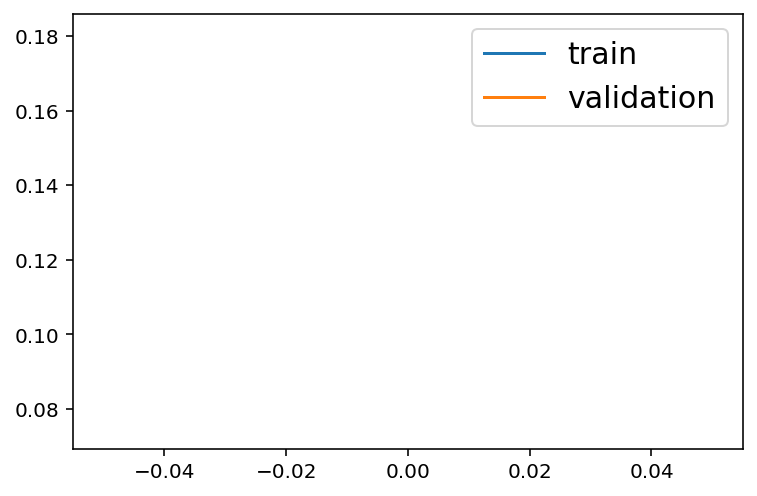

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [07:26,  8.83it/s]
1it [00:00,  7.78it/s]


Epoch None valid_loss: 0.3322940427451698
total inference time for this data is: 446.366290 secs
###############################################


total token count: 1059069
_corr2corr:960282, _corr2incorr:28777, _incorr2corr:45583, _incorr2incorr:24427
accuracy is 0.9497634242905797
word correction rate is 0.6510927010427082
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:13,  7.67it/s]



Epoch None valid_loss: 0.19413782211739827
total inference time for this data is: 13.175660 secs
###############################################


total token count: 33473
_corr2corr:31012, _corr2incorr:451, _incorr2corr:1503, _incorr2incorr:507
accuracy is 0.9713799181429809
word correction rate is 0.7477611940298508
###############################################
------------------------- In epoch: 12 -------------------------
Percent: [----------------------------->] 100% || batch_time: 0.5094 || batch_loss: 0.0749 || avg_batch_loss: 0.0664 || batch_acc: 0.9987 || avg_batch_acc: 0.9987 
Epoch 12 train_loss: 0.06640736812827985
Percent: [----------------------------->] 100% || batch_time: 0.1353 || batch_loss: 0.1677 || avg_batch_loss: 0.1775 || batch_acc: 0.9727 || avg_batch_acc: 0.9648 
Epoch 12 valid_loss: 0.17753384948928405


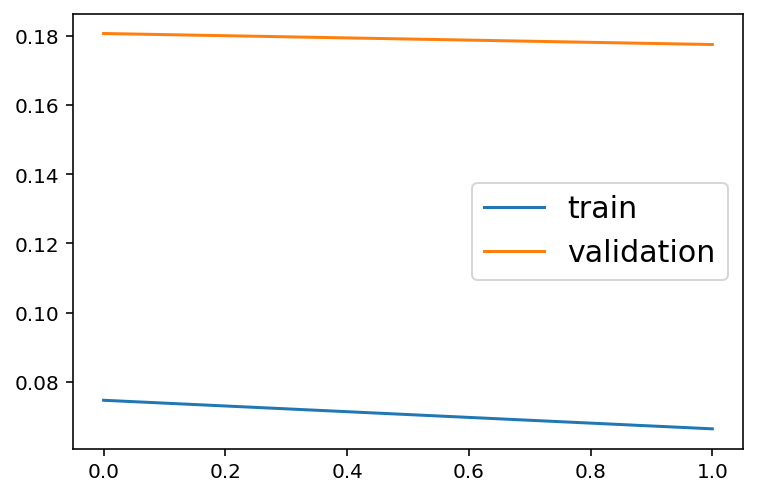

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [07:26,  8.84it/s]
1it [00:00,  7.84it/s]


Epoch None valid_loss: 0.3325767409679355
total inference time for this data is: 446.057421 secs
###############################################


total token count: 1059069
_corr2corr:960783, _corr2incorr:28276, _incorr2corr:45940, _incorr2incorr:24070
accuracy is 0.9505735698051779
word correction rate is 0.6561919725753463
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:13,  7.64it/s]



Epoch None valid_loss: 0.19542244050909977
total inference time for this data is: 13.233408 secs
###############################################


total token count: 33473
_corr2corr:30997, _corr2incorr:466, _incorr2corr:1522, _incorr2incorr:488
accuracy is 0.9714994174409225
word correction rate is 0.7572139303482587
###############################################
------------------------- In epoch: 13 -------------------------
Percent: [----------------------------->] 100% || batch_time: 0.4919 || batch_loss: 0.0717 || avg_batch_loss: 0.0609 || batch_acc: 0.9935 || avg_batch_acc: 0.9935 
Epoch 13 train_loss: 0.060889441755412846
Percent: [----------------------------->] 100% || batch_time: 0.1351 || batch_loss: 0.1679 || avg_batch_loss: 0.1734 || batch_acc: 0.9727 || avg_batch_acc: 0.9655 
Epoch 13 valid_loss: 0.17344524360216054


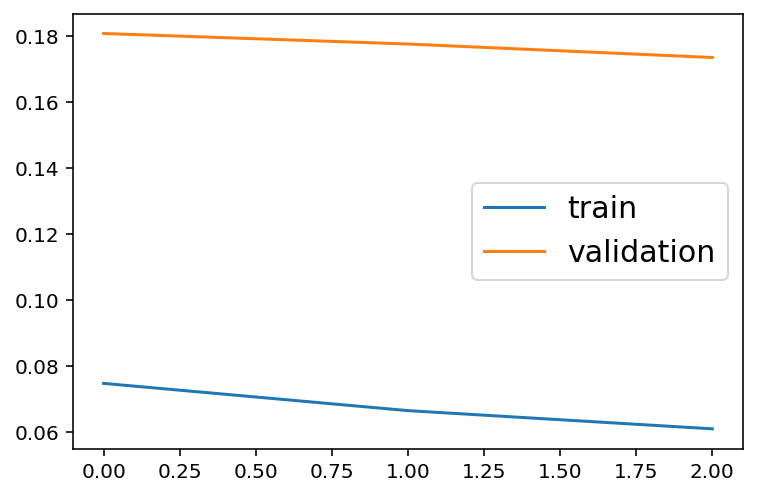

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [07:26,  8.82it/s]
1it [00:00,  7.81it/s]


Epoch None valid_loss: 0.34929466052550373
total inference time for this data is: 446.934515 secs
###############################################


total token count: 1059069
_corr2corr:961441, _corr2incorr:27618, _incorr2corr:45958, _incorr2incorr:24052
accuracy is 0.951211866271225
word correction rate is 0.6564490787030425
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:13,  7.66it/s]


Epoch None valid_loss: 0.20783412069229795
total inference time for this data is: 13.192201 secs
###############################################


total token count: 33473
_corr2corr:31024, _corr2incorr:439, _incorr2corr:1503, _incorr2incorr:507
accuracy is 0.9717384160368058
word correction rate is 0.7477611940298508
###############################################


In [10]:
MODEL_NAME = '2lstm_bert_input'

total_train_loss = []
total_val_loss = []

START_EPOCH = 11
N_EPOCHS = 13

# train and eval
for epoch_id in range(START_EPOCH,N_EPOCHS+1):

    print(f"------------------------- In epoch: {epoch_id} -------------------------")

    # train loss and backprop
    train_loss = 0.
    train_acc = 0.
    train_acc_count = 0.
    #print("train_data size: {}".format(len(train_data)))
    
    train_data_iter = batch_iter(train_data, batch_size=TRAIN_BATCH_SIZE, shuffle=True)
    nbatches = int(np.ceil(len(train_data)/TRAIN_BATCH_SIZE))


    for batch_id, (batch_labels,batch_sentences) in enumerate(train_data_iter):
      
        optimizer.zero_grad()
        st_time = time.time()

        # set batch data for bert
        batch_labels_, batch_sentences_, batch_bert_inp, batch_bert_splits = bert_tokenize_for_valid_examples(batch_labels,batch_sentences)                
        if len(batch_labels_)==0:
            print("################")
            print("Not training the following lines due to pre-processing mismatch: \n")
            print([(a,b) for a,b in zip(batch_labels,batch_sentences)])
            print("################")
            continue
        else:
            batch_labels, batch_sentences = batch_labels_, batch_sentences_

        batch_bert_inp = {k:v.to(DEVICE) for k,v in batch_bert_inp.items()}

        batch_idxs, _, batch_char_lengths = char_tokenize(batch_sentences, vocab, return_nchars=True)

        
        # set batch data for others
        batch_idxs = [batch_idxs_.to(DEVICE) for batch_idxs_ in batch_idxs]
        batch_char_lengths = [batch_char_lengths_.to(DEVICE) for batch_char_lengths_ in batch_char_lengths]


        batch_labels, batch_lengths = labelize(batch_labels, vocab)
        batch_lengths = batch_lengths.to(DEVICE)
        batch_labels = batch_labels.to(DEVICE)

        # forward
        model.train()

        loss = model(batch_idxs, batch_char_lengths, batch_lengths, batch_bert_inp, batch_bert_splits, targets=batch_labels)
        
        batch_loss = loss.cpu().detach().numpy()
        train_loss += batch_loss

        # backward
        loss.backward()

        optimizer.step()

        # compute accuracy in numpy
        if batch_id%10000==0:

            train_acc_count += 1

            model.eval()
            with torch.no_grad():
                _, batch_predictions = model(batch_idxs, batch_char_lengths, batch_lengths, batch_bert_inp, batch_bert_splits, targets=batch_labels)

            model.train()

            batch_labels = batch_labels.cpu().detach().numpy()
            batch_lengths = batch_lengths.cpu().detach().numpy()
            ncorr,ntotal = batch_accuracy_func(batch_predictions,batch_labels,batch_lengths)
            batch_acc = ncorr/ntotal
            train_acc += batch_acc     

        # update progress
        progressBar(batch_id+1,
                    int(np.ceil(len(train_data) / TRAIN_BATCH_SIZE)), 
                    ["batch_time","batch_loss","avg_batch_loss","batch_acc","avg_batch_acc"],
                    [time.time()-st_time,batch_loss,train_loss/(batch_id+1),batch_acc,train_acc/train_acc_count]) 
    
    print(f"\nEpoch {epoch_id} train_loss: {train_loss/(batch_id+1)}")

    mean_batch_loss = train_loss / nbatches
    total_train_loss.append(mean_batch_loss)


    # save model and optimizer every epoch
    model_name = MODEL_NAME + "_epoch_" + str(epoch_id) + '.pt'
    torch.save(model.state_dict(), 
            '/content/drive/MyDrive/NLP/'+model_name)
    
    # save optimizer
    optimizer_name = MODEL_NAME + "_optimizer_epoch_" + str(epoch_id) + '.pt'
    torch.save(optimizer.state_dict(), 
        '/content/drive/MyDrive/NLP/'+optimizer_name)

    # valid loss
    valid_loss = 0.
    valid_acc = 0.
    #print("valid_data size: {}".format(len(valid_data)))

    valid_data_iter = batch_iter(valid_data, batch_size=VALID_BATCH_SIZE, shuffle=False)
    val_nbatches = int(np.ceil(len(valid_data)/VALID_BATCH_SIZE))

    for batch_id, (batch_labels,batch_sentences) in enumerate(valid_data_iter):

        st_time = time.time()
        # set batch data for bert
        # batch_labels_, batch_sentences_, batch_bert_inp, batch_bert_splits = bert_tokenize_for_valid_examples(batch_labels,batch_sentences)

        # set batch data for bert
        batch_labels_, batch_sentences_, batch_bert_inp, batch_bert_splits = bert_tokenize_for_valid_examples(batch_labels,batch_sentences)                
        if len(batch_labels_)==0:
            print("################")
            print("Not training the following lines due to pre-processing mismatch: \n")
            print([(a,b) for a,b in zip(batch_labels,batch_sentences)])
            print("################")
            continue
        else:
            batch_labels, batch_sentences = batch_labels_, batch_sentences_

        batch_bert_inp = {k:v.to(DEVICE) for k,v in batch_bert_inp.items()}

        batch_idxs, _, batch_char_lengths = char_tokenize(batch_sentences, vocab, return_nchars=True)

        
        # set batch data for others
        batch_idxs = [batch_idxs_.to(DEVICE) for batch_idxs_ in batch_idxs]
        batch_char_lengths = [batch_char_lengths_.to(DEVICE) for batch_char_lengths_ in batch_char_lengths]

        # set batch data for others
        batch_labels, batch_lengths = labelize(batch_labels, vocab)
        batch_lengths = batch_lengths.to(DEVICE)
        batch_labels = batch_labels.to(DEVICE)

        # forward
        model.eval()
        with torch.no_grad():
            batch_loss, batch_predictions = model(batch_idxs, batch_char_lengths, batch_lengths, batch_bert_inp, batch_bert_splits, targets=batch_labels)
        model.train()        
        valid_loss += batch_loss
        # compute accuracy in numpy
        batch_labels = batch_labels.cpu().detach().numpy()
        batch_lengths = batch_lengths.cpu().detach().numpy()
        ncorr,ntotal = batch_accuracy_func(batch_predictions,batch_labels,batch_lengths)
        batch_acc = ncorr/ntotal
        valid_acc += batch_acc
        # update progress
        progressBar(batch_id+1,
                    int(np.ceil(len(valid_data) / VALID_BATCH_SIZE)), 
                    ["batch_time","batch_loss","avg_batch_loss","batch_acc","avg_batch_acc"], 
                    [time.time()-st_time,batch_loss,valid_loss/(batch_id+1),batch_acc,valid_acc/(batch_id+1)])

    print(f"\nEpoch {epoch_id} valid_loss: {valid_loss/(batch_id+1)}")

    mean_val_loss = valid_loss / val_nbatches
    total_val_loss.append(mean_val_loss)
    
    if epoch_id >= 2:
        plt.figure(epoch_id)
        plt.plot(total_train_loss, label='train')
        plt.plot(total_val_loss, label='validation')
        plt.legend(fontsize=15)
        plt.show()
    
    print("||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||")
    
    predicted_result = model_inference(model, test_data_60k, 1, DEVICE, 16, vocab)

    print("||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||")

    predicted_result = model_inference(model, test_data_jfleg, 1, DEVICE, 16, vocab)
  

------------------------- In epoch: 7 -------------------------
Percent: [----------------------------->] 100% || batch_time: 0.4930 || batch_loss: 0.1287 || avg_batch_loss: 0.1458 || batch_acc: 0.9908 || avg_batch_acc: 0.9908 
Epoch 7 train_loss: 0.14575169567213692
Percent: [----------------------------->] 100% || batch_time: 0.1351 || batch_loss: 0.2138 || avg_batch_loss: 0.2119 || batch_acc: 0.9590 || avg_batch_acc: 0.9604 
Epoch 7 valid_loss: 0.2118858505537694


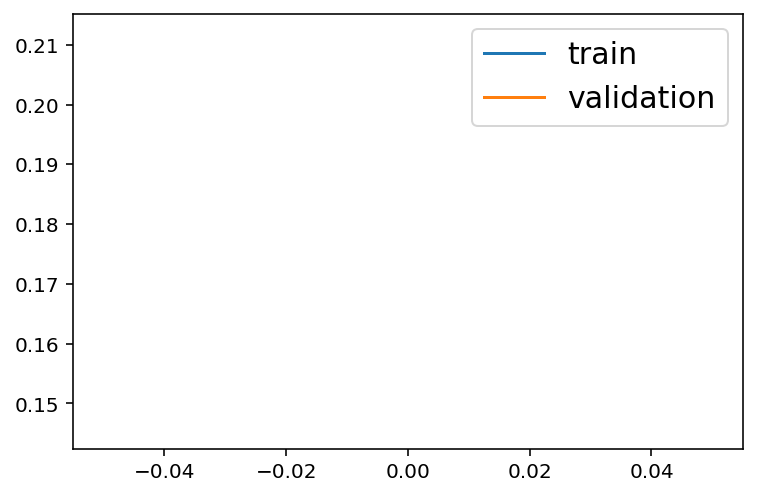

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [07:26,  8.83it/s]
1it [00:00,  7.48it/s]


Epoch None valid_loss: 0.3504049458168305
total inference time for this data is: 446.251428 secs
###############################################


total token count: 1059069
_corr2corr:960985, _corr2incorr:28074, _incorr2corr:44446, _incorr2incorr:25564
accuracy is 0.9493536304055732
word correction rate is 0.6348521639765747
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:13,  7.63it/s]



Epoch None valid_loss: 0.21001693628507084
total inference time for this data is: 13.254770 secs
###############################################


total token count: 33473
_corr2corr:31010, _corr2incorr:453, _incorr2corr:1495, _incorr2incorr:515
accuracy is 0.9710811698981269
word correction rate is 0.7437810945273632
###############################################
------------------------- In epoch: 8 -------------------------
Percent: [----------------------------->] 100% || batch_time: 0.4863 || batch_loss: 0.1232 || avg_batch_loss: 0.1216 || batch_acc: 0.9893 || avg_batch_acc: 0.9893 
Epoch 8 train_loss: 0.12162531565499474
Percent: [----------------------------->] 100% || batch_time: 0.1355 || batch_loss: 0.1864 || avg_batch_loss: 0.1985 || batch_acc: 0.9658 || avg_batch_acc: 0.9619 
Epoch 8 valid_loss: 0.19847598267976518


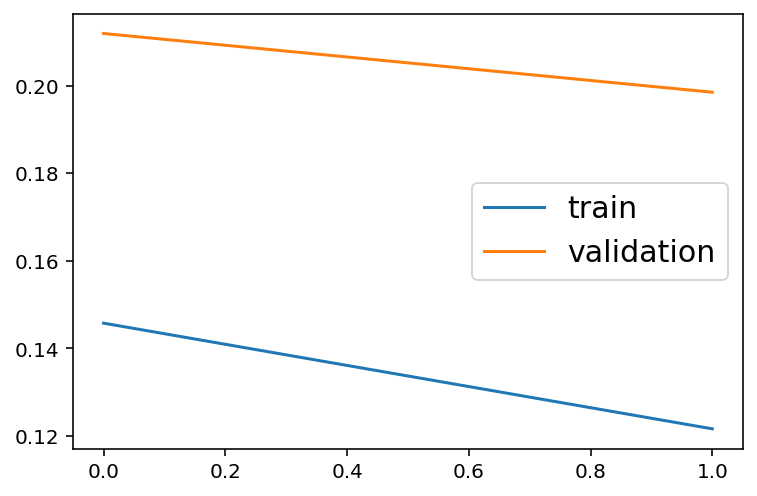

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [07:27,  8.81it/s]
1it [00:00,  7.84it/s]


Epoch None valid_loss: 0.3069032485890104
total inference time for this data is: 447.101948 secs
###############################################


total token count: 1059069
_corr2corr:962671, _corr2incorr:26388, _incorr2corr:44737, _incorr2incorr:25273
accuracy is 0.9512203643010985
word correction rate is 0.6390087130409942
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:13,  7.64it/s]



Epoch None valid_loss: 0.19378584366992557
total inference time for this data is: 13.229893 secs
###############################################


total token count: 33473
_corr2corr:31030, _corr2incorr:433, _incorr2corr:1490, _incorr2incorr:520
accuracy is 0.971529292265408
word correction rate is 0.7412935323383084
###############################################
------------------------- In epoch: 9 -------------------------
Percent: [----------------------------->] 100% || batch_time: 0.5103 || batch_loss: 0.1207 || avg_batch_loss: 0.1017 || batch_acc: 0.9889 || avg_batch_acc: 0.9889 
Epoch 9 train_loss: 0.1016661149799529
Percent: [----------------------------->] 100% || batch_time: 0.1376 || batch_loss: 0.1932 || avg_batch_loss: 0.1933 || batch_acc: 0.9636 || avg_batch_acc: 0.9627 
Epoch 9 valid_loss: 0.19328904957172463


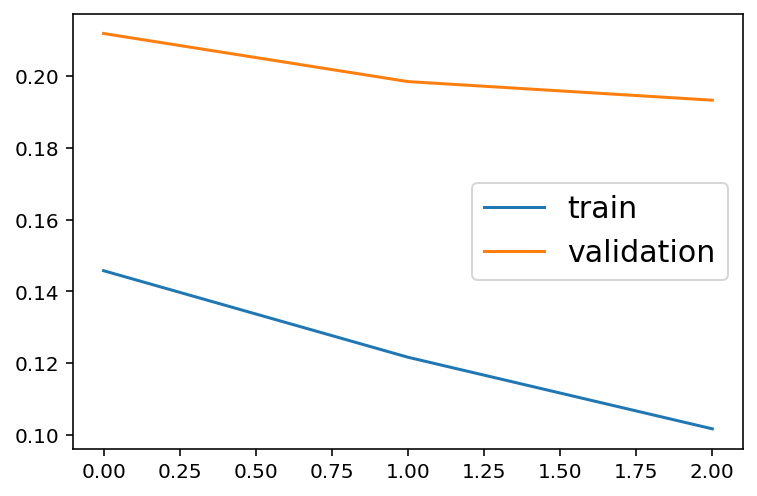

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [07:27,  8.81it/s]
1it [00:00,  7.81it/s]


Epoch None valid_loss: 0.33436433718211533
total inference time for this data is: 447.158419 secs
###############################################


total token count: 1059069
_corr2corr:960858, _corr2incorr:28201, _incorr2corr:45341, _incorr2incorr:24669
accuracy is 0.9500787956214373
word correction rate is 0.6476360519925725
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:13,  7.61it/s]



Epoch None valid_loss: 0.20858868714975248
total inference time for this data is: 13.288103 secs
###############################################


total token count: 33473
_corr2corr:30976, _corr2incorr:487, _incorr2corr:1491, _incorr2incorr:519
accuracy is 0.9699459265676814
word correction rate is 0.7417910447761195
###############################################
------------------------- In epoch: 10 -------------------------
Percent: [----------------------------->] 100% || batch_time: 0.4898 || batch_loss: 0.1774 || avg_batch_loss: 0.0866 || batch_acc: 0.9943 || avg_batch_acc: 0.9943 
Epoch 10 train_loss: 0.0865758027453669
Percent: [----------------------------->] 100% || batch_time: 0.1352 || batch_loss: 0.1645 || avg_batch_loss: 0.1824 || batch_acc: 0.9772 || avg_batch_acc: 0.9641 
Epoch 10 valid_loss: 0.18243966455761107


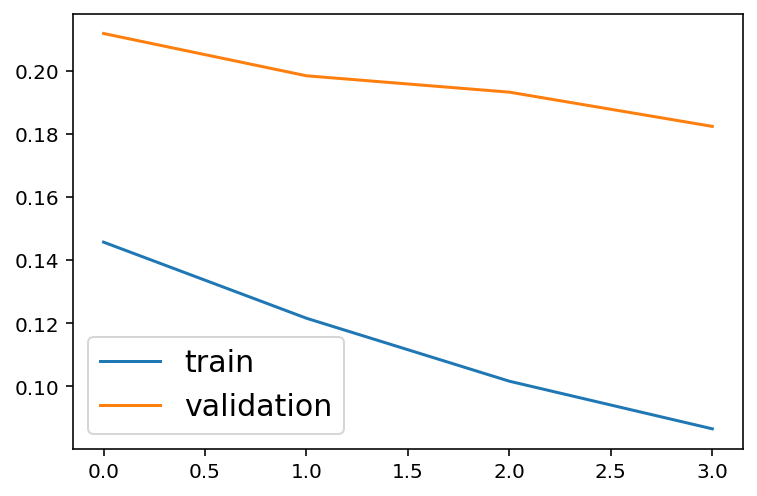

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [07:27,  8.81it/s]
1it [00:00,  7.84it/s]


Epoch None valid_loss: 0.3508300087165368
total inference time for this data is: 447.116301 secs
###############################################


total token count: 1059069
_corr2corr:961595, _corr2incorr:27464, _incorr2corr:45330, _incorr2incorr:24680
accuracy is 0.9507643033645589
word correction rate is 0.6474789315812027
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:13,  7.66it/s]


Epoch None valid_loss: 0.20401067100465298
total inference time for this data is: 13.199579 secs
###############################################


total token count: 33473
_corr2corr:31030, _corr2incorr:433, _incorr2corr:1506, _incorr2incorr:504
accuracy is 0.9720072894571744
word correction rate is 0.7492537313432835
###############################################


In [9]:
MODEL_NAME = '2lstm_bert_input'

total_train_loss = []
total_val_loss = []

START_EPOCH = 7
N_EPOCHS = 10

# train and eval
for epoch_id in range(START_EPOCH,N_EPOCHS+1):

    print(f"------------------------- In epoch: {epoch_id} -------------------------")

    # train loss and backprop
    train_loss = 0.
    train_acc = 0.
    train_acc_count = 0.
    #print("train_data size: {}".format(len(train_data)))
    
    train_data_iter = batch_iter(train_data, batch_size=TRAIN_BATCH_SIZE, shuffle=True)
    nbatches = int(np.ceil(len(train_data)/TRAIN_BATCH_SIZE))


    for batch_id, (batch_labels,batch_sentences) in enumerate(train_data_iter):
      
        optimizer.zero_grad()
        st_time = time.time()

        # set batch data for bert
        batch_labels_, batch_sentences_, batch_bert_inp, batch_bert_splits = bert_tokenize_for_valid_examples(batch_labels,batch_sentences)                
        if len(batch_labels_)==0:
            print("################")
            print("Not training the following lines due to pre-processing mismatch: \n")
            print([(a,b) for a,b in zip(batch_labels,batch_sentences)])
            print("################")
            continue
        else:
            batch_labels, batch_sentences = batch_labels_, batch_sentences_

        batch_bert_inp = {k:v.to(DEVICE) for k,v in batch_bert_inp.items()}

        batch_idxs, _, batch_char_lengths = char_tokenize(batch_sentences, vocab, return_nchars=True)

        
        # set batch data for others
        batch_idxs = [batch_idxs_.to(DEVICE) for batch_idxs_ in batch_idxs]
        batch_char_lengths = [batch_char_lengths_.to(DEVICE) for batch_char_lengths_ in batch_char_lengths]


        batch_labels, batch_lengths = labelize(batch_labels, vocab)
        batch_lengths = batch_lengths.to(DEVICE)
        batch_labels = batch_labels.to(DEVICE)

        # forward
        model.train()

        loss = model(batch_idxs, batch_char_lengths, batch_lengths, batch_bert_inp, batch_bert_splits, targets=batch_labels)
        
        batch_loss = loss.cpu().detach().numpy()
        train_loss += batch_loss

        # backward
        loss.backward()

        optimizer.step()

        # compute accuracy in numpy
        if batch_id%10000==0:

            train_acc_count += 1

            model.eval()
            with torch.no_grad():
                _, batch_predictions = model(batch_idxs, batch_char_lengths, batch_lengths, batch_bert_inp, batch_bert_splits, targets=batch_labels)

            model.train()

            batch_labels = batch_labels.cpu().detach().numpy()
            batch_lengths = batch_lengths.cpu().detach().numpy()
            ncorr,ntotal = batch_accuracy_func(batch_predictions,batch_labels,batch_lengths)
            batch_acc = ncorr/ntotal
            train_acc += batch_acc     

        # update progress
        progressBar(batch_id+1,
                    int(np.ceil(len(train_data) / TRAIN_BATCH_SIZE)), 
                    ["batch_time","batch_loss","avg_batch_loss","batch_acc","avg_batch_acc"],
                    [time.time()-st_time,batch_loss,train_loss/(batch_id+1),batch_acc,train_acc/train_acc_count]) 
    
    print(f"\nEpoch {epoch_id} train_loss: {train_loss/(batch_id+1)}")

    mean_batch_loss = train_loss / nbatches
    total_train_loss.append(mean_batch_loss)


    # save model and optimizer every epoch
    model_name = MODEL_NAME + "_epoch_" + str(epoch_id) + '.pt'
    torch.save(model.state_dict(), 
            '/content/drive/MyDrive/NLP/'+model_name)
    
    # save optimizer
    optimizer_name = MODEL_NAME + "_optimizer_epoch_" + str(epoch_id) + '.pt'
    torch.save(optimizer.state_dict(), 
        '/content/drive/MyDrive/NLP/'+optimizer_name)

    # valid loss
    valid_loss = 0.
    valid_acc = 0.
    #print("valid_data size: {}".format(len(valid_data)))

    valid_data_iter = batch_iter(valid_data, batch_size=VALID_BATCH_SIZE, shuffle=False)
    val_nbatches = int(np.ceil(len(valid_data)/VALID_BATCH_SIZE))

    for batch_id, (batch_labels,batch_sentences) in enumerate(valid_data_iter):

        st_time = time.time()
        # set batch data for bert
        # batch_labels_, batch_sentences_, batch_bert_inp, batch_bert_splits = bert_tokenize_for_valid_examples(batch_labels,batch_sentences)

        # set batch data for bert
        batch_labels_, batch_sentences_, batch_bert_inp, batch_bert_splits = bert_tokenize_for_valid_examples(batch_labels,batch_sentences)                
        if len(batch_labels_)==0:
            print("################")
            print("Not training the following lines due to pre-processing mismatch: \n")
            print([(a,b) for a,b in zip(batch_labels,batch_sentences)])
            print("################")
            continue
        else:
            batch_labels, batch_sentences = batch_labels_, batch_sentences_

        batch_bert_inp = {k:v.to(DEVICE) for k,v in batch_bert_inp.items()}

        batch_idxs, _, batch_char_lengths = char_tokenize(batch_sentences, vocab, return_nchars=True)

        
        # set batch data for others
        batch_idxs = [batch_idxs_.to(DEVICE) for batch_idxs_ in batch_idxs]
        batch_char_lengths = [batch_char_lengths_.to(DEVICE) for batch_char_lengths_ in batch_char_lengths]

        # set batch data for others
        batch_labels, batch_lengths = labelize(batch_labels, vocab)
        batch_lengths = batch_lengths.to(DEVICE)
        batch_labels = batch_labels.to(DEVICE)

        # forward
        model.eval()
        with torch.no_grad():
            batch_loss, batch_predictions = model(batch_idxs, batch_char_lengths, batch_lengths, batch_bert_inp, batch_bert_splits, targets=batch_labels)
        model.train()        
        valid_loss += batch_loss
        # compute accuracy in numpy
        batch_labels = batch_labels.cpu().detach().numpy()
        batch_lengths = batch_lengths.cpu().detach().numpy()
        ncorr,ntotal = batch_accuracy_func(batch_predictions,batch_labels,batch_lengths)
        batch_acc = ncorr/ntotal
        valid_acc += batch_acc
        # update progress
        progressBar(batch_id+1,
                    int(np.ceil(len(valid_data) / VALID_BATCH_SIZE)), 
                    ["batch_time","batch_loss","avg_batch_loss","batch_acc","avg_batch_acc"], 
                    [time.time()-st_time,batch_loss,valid_loss/(batch_id+1),batch_acc,valid_acc/(batch_id+1)])

    print(f"\nEpoch {epoch_id} valid_loss: {valid_loss/(batch_id+1)}")

    mean_val_loss = valid_loss / val_nbatches
    total_val_loss.append(mean_val_loss)
    
    if epoch_id >= 2:
        plt.figure(epoch_id)
        plt.plot(total_train_loss, label='train')
        plt.plot(total_val_loss, label='validation')
        plt.legend(fontsize=15)
        plt.show()
    
    print("||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||")
    
    predicted_result = model_inference(model, test_data_60k, 1, DEVICE, 16, vocab)

    print("||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||")

    predicted_result = model_inference(model, test_data_jfleg, 1, DEVICE, 16, vocab)
  

------------------------- In epoch: 1 -------------------------



Percent: [----------------------------->] 100% || batch_time: 0.4933 || batch_loss: 0.9576 || avg_batch_loss: 2.3481 || batch_acc: 0.0171 || avg_batch_acc: 0.0171 
Epoch 1 train_loss: 2.348095876619363
Percent: [----------------------------->] 100% || batch_time: 0.1362 || batch_loss: 0.7287 || avg_batch_loss: 0.9274 || batch_acc: 0.9066 || avg_batch_acc: 0.8842 

0it [00:00, ?it/s]


Epoch 1 valid_loss: 0.9274040870979184
||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [08:01,  8.19it/s]
1it [00:00,  7.28it/s]


Epoch None valid_loss: 0.7410604053570878
total inference time for this data is: 481.274443 secs
###############################################


total token count: 1059069
_corr2corr:950182, _corr2incorr:38877, _incorr2corr:27096, _incorr2incorr:42914
accuracy is 0.9227708487360125
word correction rate is 0.3870304242251107
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:14,  7.16it/s]



Epoch None valid_loss: 0.5763516898202424
total inference time for this data is: 14.116046 secs
###############################################


total token count: 33473
_corr2corr:30375, _corr2incorr:1088, _incorr2corr:908, _incorr2incorr:1102
accuracy is 0.9345741343769606
word correction rate is 0.45174129353233833
###############################################
------------------------- In epoch: 2 -------------------------
Percent: [----------------------------->] 100% || batch_time: 0.4870 || batch_loss: 0.5789 || avg_batch_loss: 0.7509 || batch_acc: 0.8961 || avg_batch_acc: 0.8961 
Epoch 2 train_loss: 0.7508860568466735
Percent: [----------------------------->] 100% || batch_time: 0.1364 || batch_loss: 0.4123 || avg_batch_loss: 0.5083 || batch_acc: 0.9362 || avg_batch_acc: 0.9307 
Epoch 2 valid_loss: 0.5082651955670998


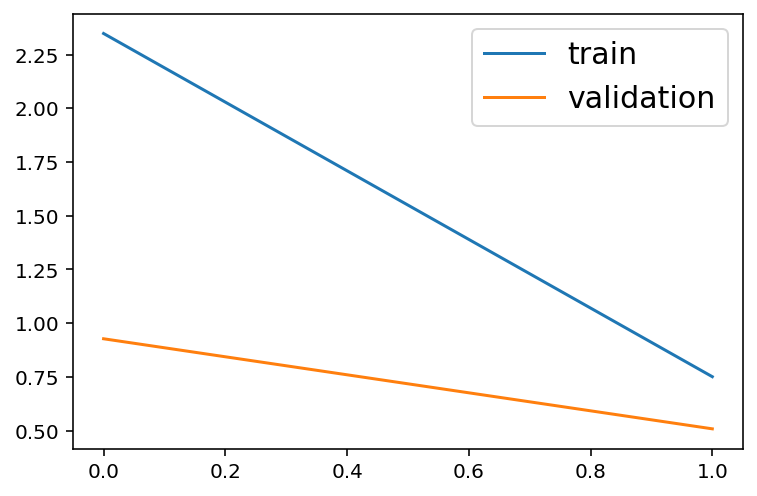

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [08:13,  7.98it/s]
1it [00:00,  7.22it/s]


Epoch None valid_loss: 0.4940934561380152
total inference time for this data is: 493.598809 secs
###############################################


total token count: 1059069
_corr2corr:963155, _corr2incorr:25904, _incorr2corr:36171, _incorr2incorr:33839
accuracy is 0.9435891334747784
word correction rate is 0.5166547636051992
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:14,  7.04it/s]



Epoch None valid_loss: 0.3218418446802857
total inference time for this data is: 14.354719 secs
###############################################


total token count: 33473
_corr2corr:30961, _corr2incorr:502, _incorr2corr:1278, _incorr2incorr:732
accuracy is 0.9631344665850088
word correction rate is 0.6358208955223881
###############################################
------------------------- In epoch: 3 -------------------------
Percent: [----------------------------->] 100% || batch_time: 0.5104 || batch_loss: 0.3768 || avg_batch_loss: 0.4559 || batch_acc: 0.9470 || avg_batch_acc: 0.9470 
Epoch 3 train_loss: 0.45585538467658554
Percent: [----------------------------->] 100% || batch_time: 0.1366 || batch_loss: 0.3104 || avg_batch_loss: 0.3633 || batch_acc: 0.9567 || avg_batch_acc: 0.9451 
Epoch 3 valid_loss: 0.36330174747200145


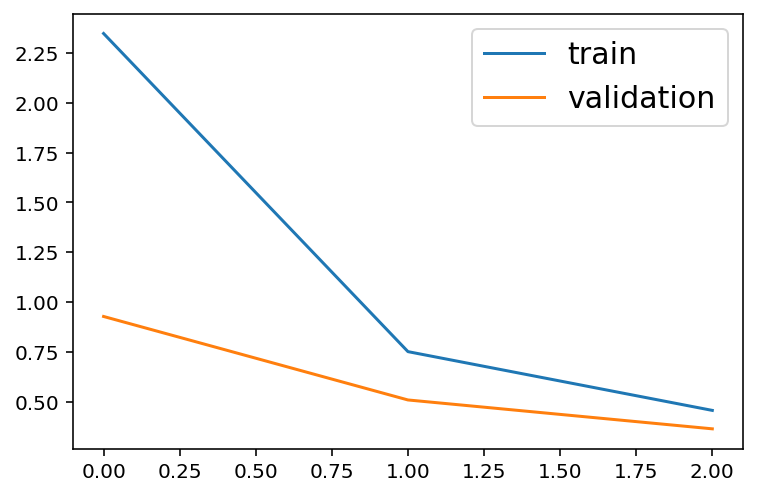

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [08:02,  8.17it/s]
1it [00:00,  7.29it/s]


Epoch None valid_loss: 0.41531375367397644
total inference time for this data is: 482.166755 secs
###############################################


total token count: 1059069
_corr2corr:962781, _corr2incorr:26278, _incorr2corr:39833, _incorr2incorr:30177
accuracy is 0.9466937470551966
word correction rate is 0.5689615769175832
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:14,  7.17it/s]



Epoch None valid_loss: 0.2612644622083938
total inference time for this data is: 14.103848 secs
###############################################


total token count: 33473
_corr2corr:30982, _corr2incorr:481, _incorr2corr:1352, _incorr2incorr:658
accuracy is 0.9659725749111224
word correction rate is 0.672636815920398
###############################################
------------------------- In epoch: 4 -------------------------
Percent: [----------------------------->] 100% || batch_time: 0.4967 || batch_loss: 0.4674 || avg_batch_loss: 0.3175 || batch_acc: 0.9569 || avg_batch_acc: 0.9569 
Epoch 4 train_loss: 0.3175101988841953
Percent: [----------------------------->] 100% || batch_time: 0.1373 || batch_loss: 0.2340 || avg_batch_loss: 0.2918 || batch_acc: 0.9522 || avg_batch_acc: 0.9521 
Epoch 4 valid_loss: 0.291750538265398


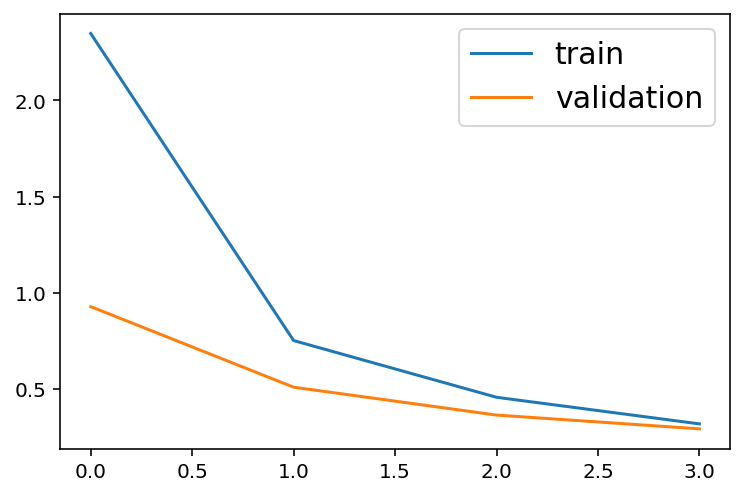

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [08:01,  8.18it/s]
1it [00:00,  7.29it/s]


Epoch None valid_loss: 0.3737352838802613
total inference time for this data is: 481.842992 secs
###############################################


total token count: 1059069
_corr2corr:960706, _corr2incorr:28353, _incorr2corr:42010, _incorr2incorr:28000
accuracy is 0.9467900580604286
word correction rate is 0.6000571346950435
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:14,  7.11it/s]



Epoch None valid_loss: 0.22425649720843477
total inference time for this data is: 14.215370 secs
###############################################


total token count: 33473
_corr2corr:30987, _corr2incorr:476, _incorr2corr:1414, _incorr2incorr:596
accuracy is 0.9679741881516446
word correction rate is 0.7034825870646766
###############################################
------------------------- In epoch: 5 -------------------------
Percent: [----------------------------->] 100% || batch_time: 0.5545 || batch_loss: 0.2162 || avg_batch_loss: 0.2376 || batch_acc: 0.9773 || avg_batch_acc: 0.9773 
Epoch 5 train_loss: 0.23758319575427814
Percent: [----------------------------->] 100% || batch_time: 0.1368 || batch_loss: 0.2061 || avg_batch_loss: 0.2520 || batch_acc: 0.9613 || avg_batch_acc: 0.9559 
Epoch 5 valid_loss: 0.2519598744059335


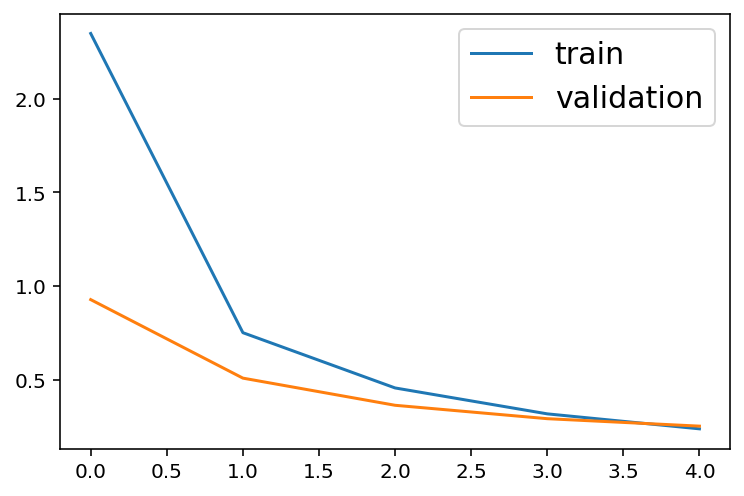

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [08:00,  8.20it/s]
1it [00:00,  7.36it/s]


Epoch None valid_loss: 0.36480566784096713
total inference time for this data is: 480.834913 secs
###############################################


total token count: 1059069
_corr2corr:961489, _corr2incorr:27570, _incorr2corr:43242, _incorr2incorr:26768
accuracy is 0.9486926725265303
word correction rate is 0.6176546207684617
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:14,  7.18it/s]



Epoch None valid_loss: 0.2219867141972674
total inference time for this data is: 14.082109 secs
###############################################


total token count: 33473
_corr2corr:30978, _corr2incorr:485, _incorr2corr:1435, _incorr2incorr:575
accuracy is 0.9683326860454695
word correction rate is 0.7139303482587065
###############################################
------------------------- In epoch: 6 -------------------------
Percent: [----------------------------->] 100% || batch_time: 0.5158 || batch_loss: 0.1510 || avg_batch_loss: 0.1853 || batch_acc: 0.9833 || avg_batch_acc: 0.9833 
Epoch 6 train_loss: 0.1852868326566968
Percent: [----------------------------->] 100% || batch_time: 0.1363 || batch_loss: 0.1778 || avg_batch_loss: 0.2263 || batch_acc: 0.9590 || avg_batch_acc: 0.9586 
Epoch 6 valid_loss: 0.22633075665255062


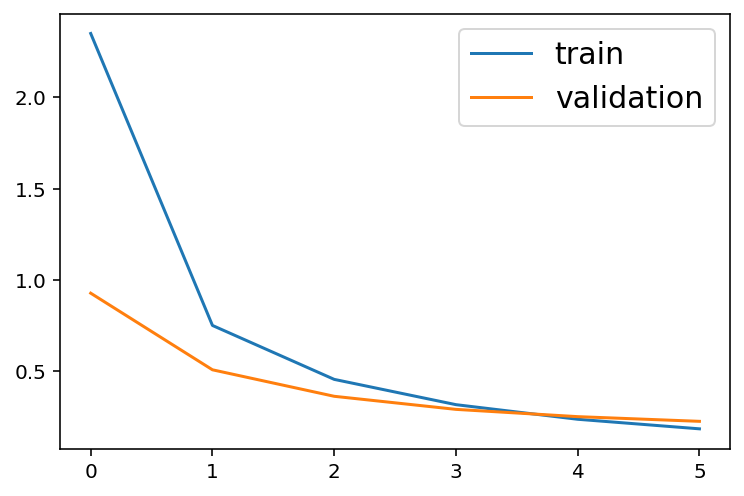

0it [00:00, ?it/s]

||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||
###############################################
data size: 63044


3941it [08:02,  8.16it/s]
1it [00:00,  7.39it/s]


Epoch None valid_loss: 0.35650509250612844
total inference time for this data is: 482.778584 secs
###############################################


total token count: 1059069
_corr2corr:959411, _corr2incorr:29648, _incorr2corr:43845, _incorr2incorr:26165
accuracy is 0.947299939852833
word correction rate is 0.6262676760462791
###############################################
||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||
###############################################
data size: 1601


101it [00:14,  7.17it/s]


Epoch None valid_loss: 0.22054780643470218
total inference time for this data is: 14.092429 secs
###############################################


total token count: 33473
_corr2corr:30989, _corr2incorr:474, _incorr2corr:1484, _incorr2incorr:526
accuracy is 0.9701251755145939
word correction rate is 0.7383084577114428
###############################################


In [21]:
MODEL_NAME = '2lstm_bert_input'

total_train_loss = []
total_val_loss = []

# train and eval
for epoch_id in range(START_EPOCH,N_EPOCHS+1):

    print(f"------------------------- In epoch: {epoch_id} -------------------------")

    # train loss and backprop
    train_loss = 0.
    train_acc = 0.
    train_acc_count = 0.
    #print("train_data size: {}".format(len(train_data)))
    
    train_data_iter = batch_iter(train_data, batch_size=TRAIN_BATCH_SIZE, shuffle=True)
    nbatches = int(np.ceil(len(train_data)/TRAIN_BATCH_SIZE))


    for batch_id, (batch_labels,batch_sentences) in enumerate(train_data_iter):
      
        optimizer.zero_grad()
        st_time = time.time()

        # set batch data for bert
        batch_labels_, batch_sentences_, batch_bert_inp, batch_bert_splits = bert_tokenize_for_valid_examples(batch_labels,batch_sentences)                
        if len(batch_labels_)==0:
            print("################")
            print("Not training the following lines due to pre-processing mismatch: \n")
            print([(a,b) for a,b in zip(batch_labels,batch_sentences)])
            print("################")
            continue
        else:
            batch_labels, batch_sentences = batch_labels_, batch_sentences_

        batch_bert_inp = {k:v.to(DEVICE) for k,v in batch_bert_inp.items()}

        batch_idxs, _, batch_char_lengths = char_tokenize(batch_sentences, vocab, return_nchars=True)

        
        # set batch data for others
        batch_idxs = [batch_idxs_.to(DEVICE) for batch_idxs_ in batch_idxs]
        batch_char_lengths = [batch_char_lengths_.to(DEVICE) for batch_char_lengths_ in batch_char_lengths]


        batch_labels, batch_lengths = labelize(batch_labels, vocab)
        batch_lengths = batch_lengths.to(DEVICE)
        batch_labels = batch_labels.to(DEVICE)

        # forward
        model.train()

        loss = model(batch_idxs, batch_char_lengths, batch_lengths, batch_bert_inp, batch_bert_splits, targets=batch_labels)
        
        batch_loss = loss.cpu().detach().numpy()
        train_loss += batch_loss

        # backward
        loss.backward()

        optimizer.step()

        # compute accuracy in numpy
        if batch_id%10000==0:

            train_acc_count += 1

            model.eval()
            with torch.no_grad():
                _, batch_predictions = model(batch_idxs, batch_char_lengths, batch_lengths, batch_bert_inp, batch_bert_splits, targets=batch_labels)

            model.train()

            batch_labels = batch_labels.cpu().detach().numpy()
            batch_lengths = batch_lengths.cpu().detach().numpy()
            ncorr,ntotal = batch_accuracy_func(batch_predictions,batch_labels,batch_lengths)
            batch_acc = ncorr/ntotal
            train_acc += batch_acc     

        # update progress
        progressBar(batch_id+1,
                    int(np.ceil(len(train_data) / TRAIN_BATCH_SIZE)), 
                    ["batch_time","batch_loss","avg_batch_loss","batch_acc","avg_batch_acc"],
                    [time.time()-st_time,batch_loss,train_loss/(batch_id+1),batch_acc,train_acc/train_acc_count]) 
    
    print(f"\nEpoch {epoch_id} train_loss: {train_loss/(batch_id+1)}")

    mean_batch_loss = train_loss / nbatches
    total_train_loss.append(mean_batch_loss)


    # save model and optimizer every epoch
    model_name = MODEL_NAME + "_epoch_" + str(epoch_id) + '.pt'
    torch.save(model.state_dict(), 
            '/content/drive/MyDrive/NLP/'+model_name)
    
    # save optimizer
    optimizer_name = MODEL_NAME + "_optimizer_epoch_" + str(epoch_id) + '.pt'
    torch.save(optimizer.state_dict(), 
        '/content/drive/MyDrive/NLP/'+optimizer_name)

    # valid loss
    valid_loss = 0.
    valid_acc = 0.
    #print("valid_data size: {}".format(len(valid_data)))

    valid_data_iter = batch_iter(valid_data, batch_size=VALID_BATCH_SIZE, shuffle=False)
    val_nbatches = int(np.ceil(len(valid_data)/VALID_BATCH_SIZE))

    for batch_id, (batch_labels,batch_sentences) in enumerate(valid_data_iter):

        st_time = time.time()
        # set batch data for bert
        # batch_labels_, batch_sentences_, batch_bert_inp, batch_bert_splits = bert_tokenize_for_valid_examples(batch_labels,batch_sentences)

        # set batch data for bert
        batch_labels_, batch_sentences_, batch_bert_inp, batch_bert_splits = bert_tokenize_for_valid_examples(batch_labels,batch_sentences)                
        if len(batch_labels_)==0:
            print("################")
            print("Not training the following lines due to pre-processing mismatch: \n")
            print([(a,b) for a,b in zip(batch_labels,batch_sentences)])
            print("################")
            continue
        else:
            batch_labels, batch_sentences = batch_labels_, batch_sentences_

        batch_bert_inp = {k:v.to(DEVICE) for k,v in batch_bert_inp.items()}

        batch_idxs, _, batch_char_lengths = char_tokenize(batch_sentences, vocab, return_nchars=True)

        
        # set batch data for others
        batch_idxs = [batch_idxs_.to(DEVICE) for batch_idxs_ in batch_idxs]
        batch_char_lengths = [batch_char_lengths_.to(DEVICE) for batch_char_lengths_ in batch_char_lengths]

        # set batch data for others
        batch_labels, batch_lengths = labelize(batch_labels, vocab)
        batch_lengths = batch_lengths.to(DEVICE)
        batch_labels = batch_labels.to(DEVICE)

        # forward
        model.eval()
        with torch.no_grad():
            batch_loss, batch_predictions = model(batch_idxs, batch_char_lengths, batch_lengths, batch_bert_inp, batch_bert_splits, targets=batch_labels)
        model.train()        
        valid_loss += batch_loss
        # compute accuracy in numpy
        batch_labels = batch_labels.cpu().detach().numpy()
        batch_lengths = batch_lengths.cpu().detach().numpy()
        ncorr,ntotal = batch_accuracy_func(batch_predictions,batch_labels,batch_lengths)
        batch_acc = ncorr/ntotal
        valid_acc += batch_acc
        # update progress
        progressBar(batch_id+1,
                    int(np.ceil(len(valid_data) / VALID_BATCH_SIZE)), 
                    ["batch_time","batch_loss","avg_batch_loss","batch_acc","avg_batch_acc"], 
                    [time.time()-st_time,batch_loss,valid_loss/(batch_id+1),batch_acc,valid_acc/(batch_id+1)])

    print(f"\nEpoch {epoch_id} valid_loss: {valid_loss/(batch_id+1)}")

    mean_val_loss = valid_loss / val_nbatches
    total_val_loss.append(mean_val_loss)
    
    if epoch_id >= 2:
        plt.figure(epoch_id)
        plt.plot(total_train_loss, label='train')
        plt.plot(total_val_loss, label='validation')
        plt.legend(fontsize=15)
        plt.show()
    
    print("||||||||||||||||||||||||| BEA60K |||||||||||||||||||||||||")
    
    predicted_result = model_inference(model, test_data_60k, 1, DEVICE, 16, vocab)

    print("||||||||||||||||||||||||| JFLEG |||||||||||||||||||||||||")

    predicted_result = model_inference(model, test_data_jfleg, 1, DEVICE, 16, vocab)
  